In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

In [ ]:
import numpy as np
import os
import cv2
import tensorflow
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow. keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping  # Use TensorFlow's Keras API directly
from keras.optimizers import Adam
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/


cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d hemooredaoo/cataract

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/hemooredaoo/cataract
License(s): unknown
 98% 541M/552M [00:05<00:00, 133MB/s]
100% 552M/552M [00:05<00:00, 112MB/s]


In [ ]:
!unzip '/content/cataract.zip'

Archive:  /content/cataract.zip
  inflating: cataract-image-dataset/processed_images/test/cataract/image_246.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_247.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_248.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_249.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_250.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_251.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_252.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_253.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_254.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_255.png  
  inflating: cataract-image-dataset/processed_images/test/cataract/image_256.png  
  inflating: cataract-image-dataset/processed_images/te

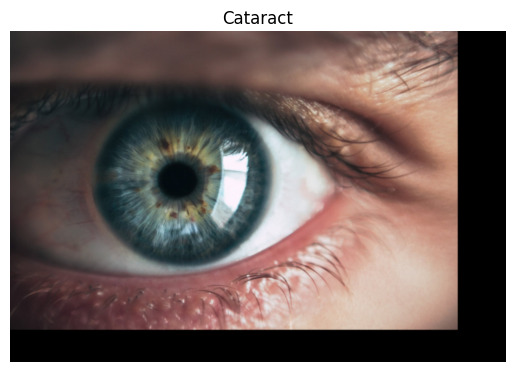

In [ ]:
#Load an image using OpenCV

image_path ='/content/cataract-image-dataset/processed_images/train/cataract/104.jpg'
img = cv2.imread(image_path)

# Convert BGR image to RGB

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib

plt.imshow(img_rgb)

plt.title('Cataract')

plt.axis('off') # Turn off axis labels

plt.show()

In [ ]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.2,
                                 rotation_range=48,
                                 fill_mode='nearest',
                                 horizontal_flip=True,
                                 shear_range=0.2)

test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
train_directory='/content/cataract-image-dataset/processed_images/train'
test_directory='/content/cataract-image-dataset/processed_images/test'

training_set = train_datagen.flow_from_directory(
    directory=train_directory,
    target_size = (224, 224),
    batch_size = 32,
    class_mode='binary'
    )

test_set = test_datagen.flow_from_directory(
    directory=test_directory,
    target_size = (224, 224),
    batch_size = 32,
    class_mode='binary'
    )

Found 978 images belonging to 2 classes.
Found 121 images belonging to 2 classes.


In [ ]:
# Load the pre-trained Xception model without the top (fully connected) layers
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

83683744/83683744 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  

In [ ]:
# Train the model
history = model.fit(
    training_set,
    steps_per_epoch=training_set.samples // training_set.batch_size,
    epochs=20,
    validation_data=test_set,
    validation_steps=test_set.samples // test_set.batch_size,
)

Epoch 1/20
30/30 [==============================] - 303s 10s/step - loss: 1.0027 - accuracy: 0.7844 - val_loss: 0.3743 - val_accuracy: 0.8854
Epoch 2/20
30/30 [==============================] - 294s 10s/step - loss: 0.3770 - accuracy: 0.8721 - val_loss: 0.2020 - val_accuracy: 0.9271
Epoch 3/20
30/30 [==============================] - 308s 10s/step - loss: 0.2497 - accuracy: 0.9049 - val_loss: 0.1740 - val_accuracy: 0.9271
Epoch 4/20
30/30 [==============================] - 319s 11s/step - loss: 0.2315 - accuracy: 0.9123 - val_loss: 0.1617 - val_accuracy: 0.9375
Epoch 5/20
30/30 [==============================] - 309s 10s/step - loss: 0.2732 - accuracy: 0.8985 - val_loss: 0.1340 - val_accuracy: 0.9375
Epoch 6/20
30/30 [==============================] - 317s 11s/step - loss: 0.2153 - accuracy: 0.9125 - val_loss: 0.0986 - val_accuracy: 0.9583
Epoch 7/20
30/30 [==============================] - 307s 10s/step - loss: 0.1781 - accuracy: 0.9260 - val_loss: 0.1482 - val_accuracy: 0.9271
Epoch 

In [ ]:


# Fine-tuning: Unfreeze some layers of the base model
for layer in base_model.layers[-50:]:  # Unfreeze the last 50 layers of the base model
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary again after unfreezing some layers
model.summary()



Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 111, 111, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 111, 111, 32)         0         ['block1_conv1_bn[0][0]'] 

In [ ]:

# Continue training for fine-tuning
history_fine_tune = model.fit(
    training_set,
    steps_per_epoch=training_set.samples // training_set.batch_size,
    epochs=10,
    validation_data=test_set,
    validation_steps=test_set.samples // test_set.batch_size
)



Epoch 1/10
30/30 [==============================] - 51s 1s/step - loss: 0.2613 - accuracy: 0.9059 - val_loss: 0.2293 - val_accuracy: 0.9271
Epoch 2/10
30/30 [==============================] - 37s 1s/step - loss: 0.2010 - accuracy: 0.9313 - val_loss: 0.1698 - val_accuracy: 0.9688
Epoch 3/10
30/30 [==============================] - 35s 1s/step - loss: 0.1365 - accuracy: 0.9609 - val_loss: 0.0504 - val_accuracy: 0.9792
Epoch 4/10
30/30 [==============================] - 38s 1s/step - loss: 0.1508 - accuracy: 0.9397 - val_loss: 0.1055 - val_accuracy: 0.9792
Epoch 5/10
30/30 [==============================] - 36s 1s/step - loss: 0.1449 - accuracy: 0.9408 - val_loss: 0.1263 - val_accuracy: 0.9688
Epoch 6/10
30/30 [==============================] - 37s 1s/step - loss: 0.1118 - accuracy: 0.9524 - val_loss: 0.1172 - val_accuracy: 0.9792
Epoch 7/10
30/30 [==============================] - 35s 1s/step - loss: 0.0979 - accuracy: 0.9598 - val_loss: 0.0880 - val_accuracy: 0.9688
Epoch 8/10
30/30 [==

In [ ]:
# Save the fine-tuned model
model.save('/content/drive/MyDrive/ai_tensorflow_projects/fine_tuned_xception.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
los, acc = model.evaluate(test_set)

4/4 [==============================] - 9s 2s/step - loss: 0.0614 - accuracy: 0.9835


# inceptionNet


In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

87910968/87910968 [==============================] - 0s 0us/step
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_4 (Bat  (None, 111, 111, 32)         96        ['conv2d_4[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 activation (Activation)   

In [ ]:
# Train the model
history = model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=20,
    validation_data=test_set,
    validation_steps=len(test_set)
)


Epoch 1/20
31/31 [==============================] - 55s 1s/step - loss: 1.8737 - accuracy: 0.7290 - val_loss: 0.2112 - val_accuracy: 0.9256
Epoch 2/20
31/31 [==============================] - 41s 1s/step - loss: 0.3082 - accuracy: 0.8773 - val_loss: 0.1585 - val_accuracy: 0.9421
Epoch 3/20
31/31 [==============================] - 36s 1s/step - loss: 0.2471 - accuracy: 0.9080 - val_loss: 0.1455 - val_accuracy: 0.9339
Epoch 4/20
31/31 [==============================] - 34s 1s/step - loss: 0.1993 - accuracy: 0.9202 - val_loss: 0.1498 - val_accuracy: 0.9504
Epoch 5/20
31/31 [==============================] - 35s 1s/step - loss: 0.1849 - accuracy: 0.9294 - val_loss: 0.1829 - val_accuracy: 0.9174
Epoch 6/20
31/31 [==============================] - 36s 1s/step - loss: 0.1687 - accuracy: 0.9356 - val_loss: 0.1816 - val_accuracy: 0.9174
Epoch 7/20
31/31 [==============================] - 36s 1s/step - loss: 0.1941 - accuracy: 0.9284 - val_loss: 0.1288 - val_accuracy: 0.9669
Epoch 8/20
31/31 [==

In [ ]:
# Fine-tuning: Unfreeze some layers of the base model
for layer in base_model.layers[-50:]:  # Unfreeze the last 50 layers of the base model
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.00001), loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary again after unfreezing some layers
model.summary()



Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d_4 (Conv2D)           (None, 111, 111, 32)         864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_4 (Bat  (None, 111, 111, 32)         96        ['conv2d_4[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization_4[

In [ ]:
# Continue training for fine-tuning
history_fine_tune = model.fit(
    training_set,
    steps_per_epoch=len(training_set),
    epochs=10,
    validation_data=test_set,
    validation_steps=len(test_set)
)


Epoch 1/10
31/31 [==============================] - 48s 1s/step - loss: 0.1638 - accuracy: 0.9356 - val_loss: 0.1368 - val_accuracy: 0.9421
Epoch 2/10
31/31 [==============================] - 34s 1s/step - loss: 0.1512 - accuracy: 0.9417 - val_loss: 0.1303 - val_accuracy: 0.9587
Epoch 3/10
31/31 [==============================] - 34s 1s/step - loss: 0.1121 - accuracy: 0.9581 - val_loss: 0.1439 - val_accuracy: 0.9587
Epoch 4/10
31/31 [==============================] - 34s 1s/step - loss: 0.1164 - accuracy: 0.9530 - val_loss: 0.1467 - val_accuracy: 0.9587
Epoch 5/10
31/31 [==============================] - 35s 1s/step - loss: 0.1215 - accuracy: 0.9509 - val_loss: 0.1434 - val_accuracy: 0.9587
Epoch 6/10
31/31 [==============================] - 36s 1s/step - loss: 0.0816 - accuracy: 0.9724 - val_loss: 0.1359 - val_accuracy: 0.9669
Epoch 7/10
31/31 [==============================] - 35s 1s/step - loss: 0.0889 - accuracy: 0.9693 - val_loss: 0.1248 - val_accuracy: 0.9669
Epoch 8/10
31/31 [==

In [ ]:
# Save the fine-tuned model
model.save('/content/drive/MyDrive/ai_tensorflow_projects/fine_tuned_inception_model.h5')

In [ ]:
los,acc = model.evaluate(test_set)

4/4 [==============================] - 4s 1s/step - loss: 0.1271 - accuracy: 0.9669


In [ ]:
from google.colab import drive
drive.flush_and_unmount() # Use flush_and_unmount to unmount Google Drive
print('Drive unmounted')